<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [1]:
! pip install min-dalle
! nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached min-dalle-0.2.28.tar.gz (11 kB)
  Created wheel for min-dalle: filename=min_dalle-0.2.28-py3-none-any.whl size=11276 sha256=2950cee9d9859f67a8d19fb66ff3f8a6d48e8aa99527f854f6070dc9b104e07f
  Stored in directory: /root/.cache/pip/wheels/c6/93/46/59099a6db4c0c4e962a4b02ea54705a5c4603ae365923f42b9
Successfully built min-dalle
Tue Jul  5 21:11:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+================

### Load Model

In [2]:
from IPython.display import display, update_display
from math import log2
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images

- `grid_size` Size of the image grid.  3x3 works best when displaying intermediate outputs.  4x4 has been tested to work on T4 and P100 with intermediate outputs off

- `intermediate_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

- `top_k` Each image token is sampled from the top $k$ most probable tokens

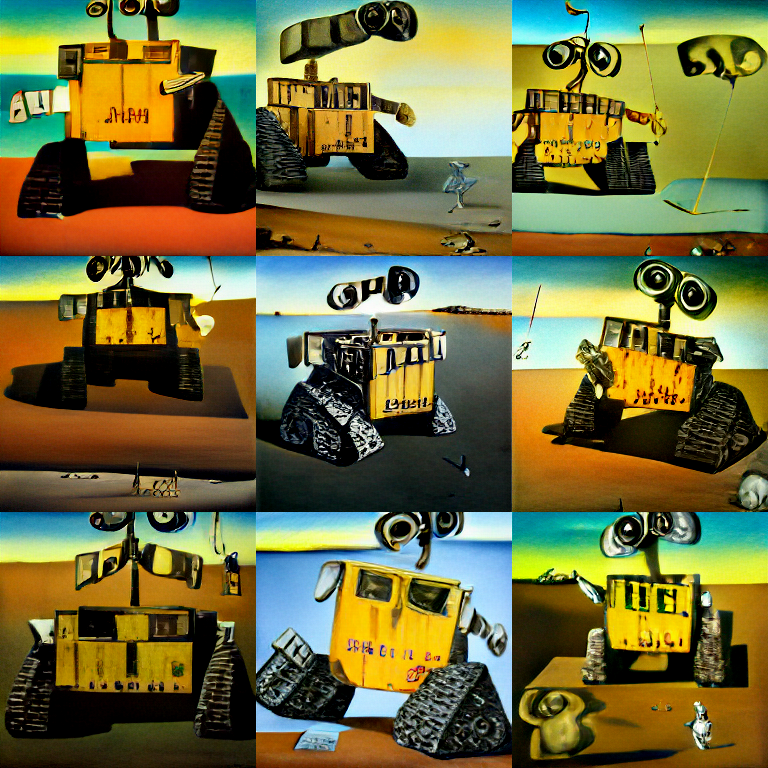

CPU times: user 34.1 s, sys: 448 ms, total: 34.6 s
Wall time: 34.4 s


In [7]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
intermediate_outputs = True #@param {type:"boolean"}
grid_size = 3 #@param {type:"integer"}
supercondition_factor = 16 #@param ["2", "4", "8", "16", "32", "64"] {type:"raw"}
top_k = 64 #@param ["2", "4", "8", "16", "32", "64", "128", "256", "512", "1024"] {type:"raw"}
log2_mid_count = 3 if intermediate_outputs else 0

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    log2_mid_count=log2_mid_count,
    log2_k=int(log2(top_k)),
    log2_supercondition_factor=log2(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False